In [25]:
import pandas as pd
import seaborn as sns


In [2]:
text = pd.read_csv('preprocessed_dataset.csv')
topic_probabilities = pd.read_csv('tetafinal.csv')

In [3]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24110 entries, 0 to 24109
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_about                   24110 non-null  object 
 1   review_scores_communication  18900 non-null  float64
 2   review_scores_rating         18906 non-null  float64
 3   host_listings_count          24110 non-null  float64
 4   language                     24110 non-null  object 
 5   tokenized_description        24110 non-null  object 
 6   filtered_description         24110 non-null  object 
 7   selected_words               24110 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.5+ MB


In [4]:
topic_probabilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24110 entries, 0 to 24109
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    24110 non-null  object 
 1   profession    24110 non-null  float64
 2   friendly      24110 non-null  float64
 3   availability  24110 non-null  float64
 4   family        24110 non-null  float64
 5   passion       24110 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.1+ MB


In [5]:
data = pd.concat([text, topic_probabilities], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24110 entries, 0 to 24109
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_about                   24110 non-null  object 
 1   review_scores_communication  18900 non-null  float64
 2   review_scores_rating         18906 non-null  float64
 3   host_listings_count          24110 non-null  float64
 4   language                     24110 non-null  object 
 5   tokenized_description        24110 non-null  object 
 6   filtered_description         24110 non-null  object 
 7   selected_words               24110 non-null  object 
 8   Unnamed: 0                   24110 non-null  object 
 9   profession                   24110 non-null  float64
 10  friendly                     24110 non-null  float64
 11  availability                 24110 non-null  float64
 12  family                       24110 non-null  float64
 13  passion         

In [7]:
columns_to_keep = ["host_about",'profession', 'friendly', 'availability', 'family', 'passion']

df = data[columns_to_keep]




In [8]:
df.head()

,host_about,profession,friendly,availability,family,passion
0,"found of life , I'm curious about all types o...",0.058824,0.058824,0.058824,0.176471,0.647059
1,We have spent a lot of time traveling for work...,0.243243,0.027027,0.027027,0.027027,0.675676
2,It is always a pleasure to meet new people aro...,0.111111,0.111111,0.333333,0.111111,0.333333
3,We are a French family of four. My wife is a u...,0.016949,0.050847,0.084746,0.220339,0.627119
4,"Very lively, sociable and creative, but also r...",0.230769,0.076923,0.076923,0.076923,0.538462


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24110 entries, 0 to 24109
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   host_about    24110 non-null  object 
 1   profession    24110 non-null  float64
 2   friendly      24110 non-null  float64
 3   availability  24110 non-null  float64
 4   family        24110 non-null  float64
 5   passion       24110 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.1+ MB


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [11]:
X = topic_probabilities.iloc[:, 1:]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [13]:
clusters = kmeans.fit_predict(X_scaled)



In [42]:
df['cluster'] = clusters

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_) 

C:\Users\14384\AppData\Local\Temp\ipykernel_75396\4291978614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24110 entries, 0 to 24109
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   host_about    24110 non-null  object 
 1   profession    24110 non-null  float64
 2   friendly      24110 non-null  float64
 3   availability  24110 non-null  float64
 4   family        24110 non-null  float64
 5   passion       24110 non-null  float64
 6   cluster       24110 non-null  int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 1.2+ MB


In [22]:
num_texts_per_cluster = 10

top_texts_per_cluster = {}
for cluster_label in range(num_clusters):
    cluster_texts = df[df['cluster'] == cluster_label]['host_about'].tolist()
    top_texts_per_cluster[cluster_label] = cluster_texts[:num_texts_per_cluster]

for cluster_label, texts in top_texts_per_cluster.items():
    print(f"Cluster {cluster_label}:")
    for i, text in enumerate(texts, start=1):
        print(f"Text {i}: {text}")
    print("\n")


Cluster 0:
Text 1: found of life , I'm curious about  all types of art , travells and in good french , gastronomy, oenology,  cooking
Text 2: We have spent a lot of time traveling for work and leisure. We understand what people need when they're away from home. Guillaume and his partners manage arrivals and checkins, adding a friendly touch to every visitor. We all genuinely love Paris and try to make it easy for people to come and visit the city.
Text 3: It is always a pleasure to meet new people around the world. Come and see one of the most beautiful city in the world, Paris. Welcome home!
Text 4: We are a French family of four. My wife is a university professor, specialized in language acquisition and I am the assistant of a film director in Paris. Our eldest daughter, Yona, 29, is a climatologist, specialized on the impact of the global warming on the oceans. Our youngest, Noam, 26, loves music and computers, he plays piano and practises ultimate freebee. We enjoy having guests fr

In [45]:
nouveaux_noms_clusters = {
    0: "Hôtes Passionnés",
    1: "Hôtes Multiculturels",
    2: "Hôtes Accueillants",
    3: "Hôtes Professionnels"
}

df.loc[:, 'cluster'] = df['cluster'].map(nouveaux_noms_clusters)

print(df.head())


                                          host_about  profession  friendly  \
0  found of life , I'm curious about  all types o...    0.058824  0.058824   
1  We have spent a lot of time traveling for work...    0.243243  0.027027   
2  It is always a pleasure to meet new people aro...    0.111111  0.111111   
3  We are a French family of four. My wife is a u...    0.016949  0.050847   
4  Very lively, sociable and creative, but also r...    0.230769  0.076923   

   availability    family   passion           cluster  
0      0.058824  0.176471  0.647059  Hôtes Passionnés  
1      0.027027  0.027027  0.675676  Hôtes Passionnés  
2      0.333333  0.111111  0.333333  Hôtes Passionnés  
3      0.084746  0.220339  0.627119  Hôtes Passionnés  
4      0.076923  0.076923  0.538462  Hôtes Passionnés  


C:\Users\14384\AppData\Local\Temp\ipykernel_75396\1683601393.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Hôtes Passionnés' 'Hôtes Passionnés' 'Hôtes Passionnés' ...
 'Hôtes Multiculturels' 'Hôtes Multiculturels' 'Hôtes Multiculturels']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, 'cluster'] = df['cluster'].map(nouveaux_noms_clusters)


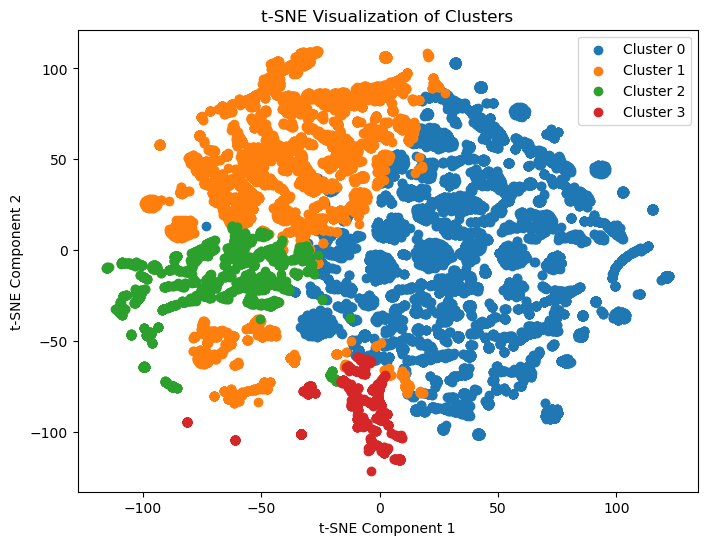

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    plt.scatter(X_tsne[clusters == cluster_label, 0], 
                X_tsne[clusters == cluster_label, 1], 
                label=f'Cluster {cluster_label}')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


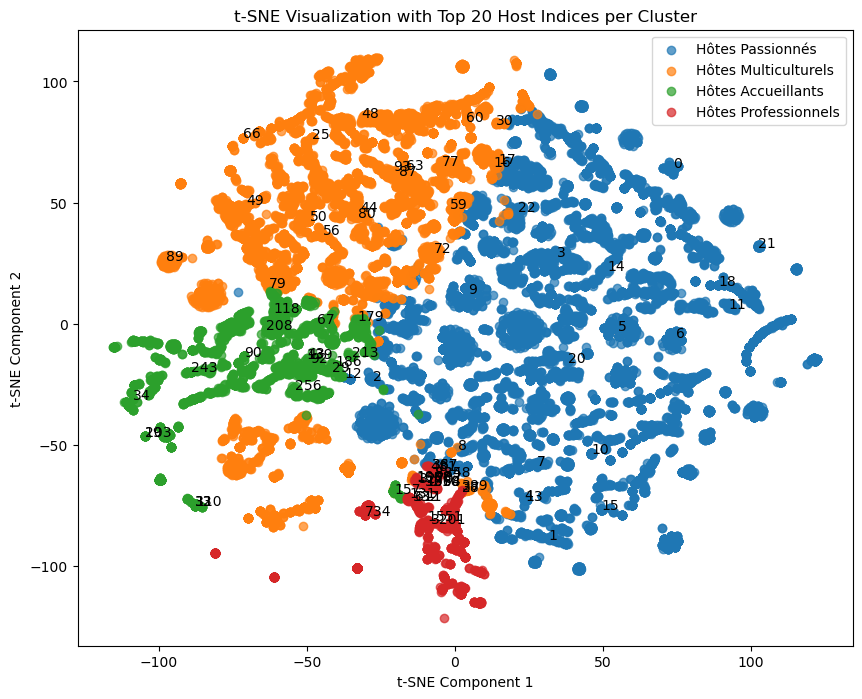

In [52]:
plt.figure(figsize=(10, 8))

nouveaux_noms_clusters = {
    0: "Hôtes Passionnés",
    1: "Hôtes Multiculturels",
    2: "Hôtes Accueillants",
    3: "Hôtes Professionnels"
}

for cluster_label in range(num_clusters):
    plt.scatter(X_tsne[clusters == cluster_label, 0], 
                X_tsne[clusters == cluster_label, 1], 
                label=f'{nouveaux_noms_clusters[cluster_label]}', alpha=0.7)

for cluster_label in range(num_clusters):
    top_indices = [idx for idx, cluster in enumerate(clusters) if cluster == cluster_label][:20]
    for idx in top_indices:
        plt.annotate(str(idx), (X_tsne[idx, 0], X_tsne[idx, 1]))

plt.title('t-SNE Visualization with Top 20 Host Indices per Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [64]:
text = pd.read_csv('listings.csv')

In [65]:
df2 = pd.concat([df, text], axis=1)

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_about                                    24110 non-null  object 
 1   profession                                    24110 non-null  float64
 2   friendly                                      24110 non-null  float64
 3   availability                                  24110 non-null  float64
 4   family                                        24110 non-null  float64
 5   passion                                       24110 non-null  float64
 6   cluster                                       24110 non-null  object 
 7   id                                            84397 non-null  int64  
 8   listing_url                                   84397 non-null  object 
 9   scrape_id                                     84397 non-null 

In [68]:
columns_to_keep = ['cluster', 'number_of_reviews_l30d']

df2 = df2[columns_to_keep]


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cluster                 24110 non-null  object
 1   number_of_reviews_l30d  84397 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [70]:
df2.head()

,cluster,number_of_reviews_l30d
0,Hôtes Passionnés,0
1,Hôtes Passionnés,0
2,Hôtes Passionnés,5
3,Hôtes Passionnés,0
4,Hôtes Passionnés,3


In [71]:
df2['number_of_reviews_l30d'] = df2['number_of_reviews_l30d'].apply(lambda x: 1 if x != 0 else 0)

In [72]:
df2.head()

,cluster,number_of_reviews_l30d
0,Hôtes Passionnés,0
1,Hôtes Passionnés,0
2,Hôtes Passionnés,1
3,Hôtes Passionnés,0
4,Hôtes Passionnés,1


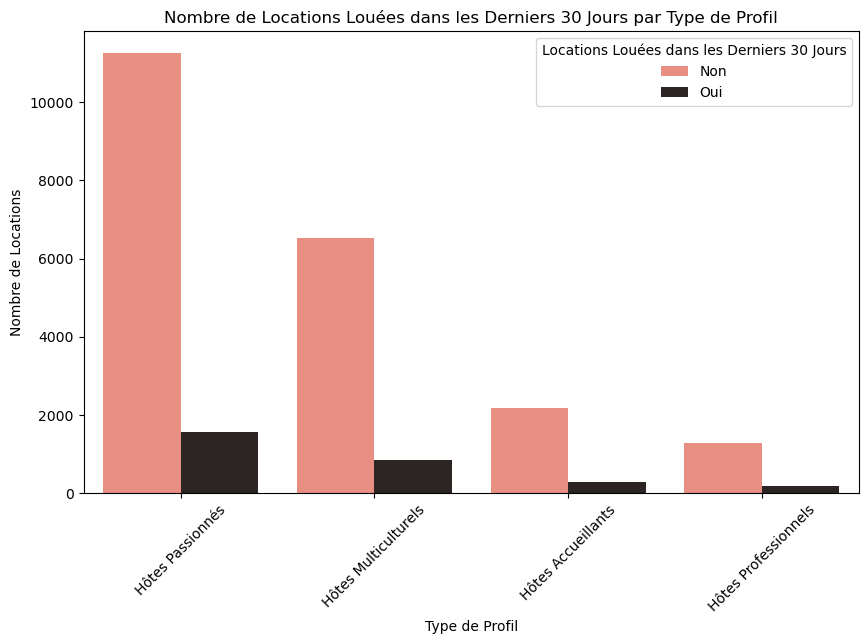

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='cluster', hue='number_of_reviews_l30d', palette='dark:salmon_r')
plt.title('Nombre de Locations Louées dans les Derniers 30 Jours par Type de Profil')
plt.xlabel('Type de Profil')
plt.ylabel('Nombre de Locations')
plt.legend(title='Locations Louées dans les Derniers 30 Jours', labels=['Non', 'Oui'])
plt.xticks(rotation=45)
plt.show()


In [94]:
rented_counts

cluster
Hôtes Accueillants       281
Hôtes Multiculturels     847
Hôtes Passionnés        1553
Hôtes Professionnels     176
Name: number_of_reviews_l30d, dtype: int64

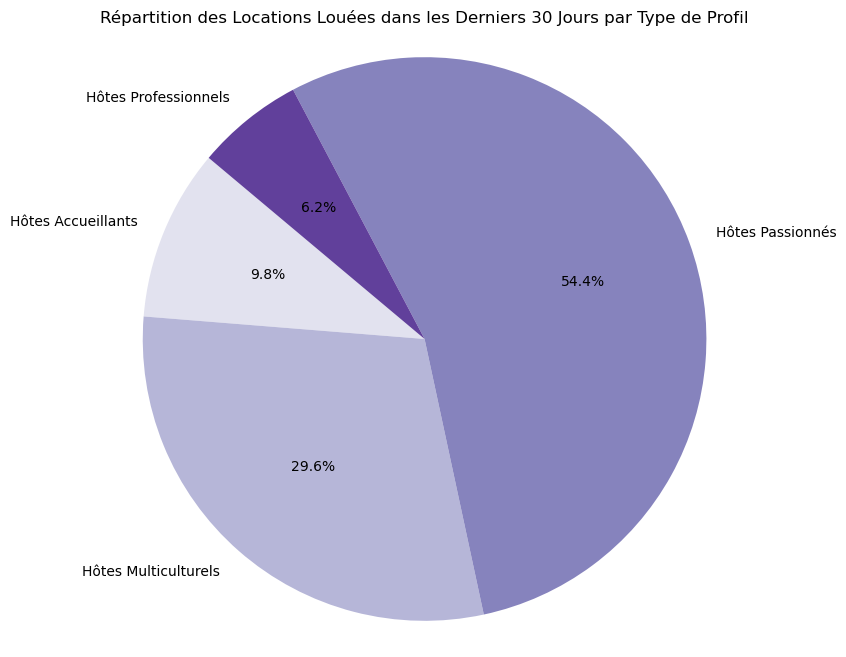

In [93]:
import seaborn as sns
import numpy as np

num_categories = len(rented_counts)

palette = sns.color_palette("Reds", num_categories)

palette = palette[::-1]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(rented_counts, labels=rented_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Purples", len(rented_counts)))
plt.title('Répartition des Locations Louées dans les Derniers 30 Jours par Type de Profil')
plt.axis('equal') 
plt.show()
